# Overview
The objective of this file is to develop a Grammar Scoring Engine for spoken data samples.The audio dataset where each file is between 45 to 60 seconds long. The ground truth labels are MOS Likert Grammar Scores for each audio instance (see rubric below). Build a model that takes an audio file as input and outputs a continuous score ranging from 0 to 5.

Training: The training dataset consists of 444 samples.

Testing (Evaluation): The testing dataset consists of 195 samples.

##  Project Report: Grammar Scoring Engine

###  Objective
The goal of this project is to **evaluate and score spoken grammar** from audio recordings using machine learning. Audio files are transcribed, linguistic features are extracted, and a regression model is trained to predict grammar scores.

---
### Approach

1. **Speech Transcription**: Each audio file is transcribed into text using a pre-trained speech-to-text model (`model.transcribe(...)`).
2. **Feature Extraction**: From the transcript, key linguistic features are extracted:
   - Total word count
   - Number of nouns
   - Number of verbs
   - Number of adjectives
   - Average word length
3. **Machine Learning**: A `RandomForestRegressor` model is trained using these features to predict a grammar score (label).

---

###  Preprocessing Steps

#### - Training Data Preprocessing
- Iterate over each row in the training dataset to:
  - Transcribe the corresponding audio file.
  - Tokenize and POS-tag the transcript.
  - Extract and compute relevant features.
  - Remove the original text (used only for analysis).
- Construct feature matrix `X_train` and label vector `y_train`.
- Handle missing values using column means.
- Standardize features using `StandardScaler`.

#### - Test Data Preprocessing
- Similar preprocessing as the training set:
  - Transcribe and extract features from each audio file.
  - Handle missing values and scale features using the scaler fit on training data.

---

### Pipeline Architecture
<pre>  Audio (.wav) - > Transcription (Speech-to-Text) -> Tokenization & POS Tagging (NLTK) ->  Feature Extraction (Nouns, Verbs, Adjectives, Avg Word Length) ->  Feature Scaling (StandardScaler) -> Random Forest Regression Model -> Predicted Grammar Score </pre>


---

###  Model Training and Evaluation

#### Model
- **Algorithm**: `RandomForestRegressor`
- **Hyperparameters**:
  - `n_estimators=200`
  - `max_depth=10`
  - `random_state=42`

#### Evaluation on Training Set
- **Mean Squared Error (MSE)**: ~0.253
- **Root Mean Squared Error (RMSE)**: **0.5030**
- **Mean Absolute Error (MAE)**: **0.4144**
- **R² Score**: **0.7695**
- **Mean Absolute Percentage Error (MAPE)**: **13.15%**

These metrics suggest a **good fit** on training data with low error and high explanatory power.

#### Visualizations
- Histogram comparing actual vs predicted values on the training set.
- Histogram of predicted grammar scores on the test set.
- Bar plot of feature importances, highlighting which linguistic attributes influenced the model the most.

---

###  Feature Importance Insights

| Feature        | Importance (↓ Sorted) |
|----------------|-----------------------|
| `total_words`  | High                  |
| `num_verbs`    | High                  |
| `avg_word_len` | Moderate              |
| `num_nouns`    | Moderate              |
| `num_adjs`     | Low                   |

This suggests that **word count and verb usage** are stronger indicators of grammatical accuracy in the model's perspective.

---

###  Output
- Final predictions on the test set are saved to **`submission.csv`** with:
  - `filename`
  - `predicted grammar score`




In [1]:
!pip install openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s e

In [2]:
!unzip /content/shl-intern-hiring-assessment.zip
%ls

Archive:  /content/shl-intern-hiring-assessment.zip
  inflating: Dataset/audios/test/audio_1001.wav  
  inflating: Dataset/audios/test/audio_1006.wav  
  inflating: Dataset/audios/test/audio_1011.wav  
  inflating: Dataset/audios/test/audio_1025.wav  
  inflating: Dataset/audios/test/audio_1028.wav  
  inflating: Dataset/audios/test/audio_1039.wav  
  inflating: Dataset/audios/test/audio_1041.wav  
  inflating: Dataset/audios/test/audio_1046.wav  
  inflating: Dataset/audios/test/audio_1055.wav  
  inflating: Dataset/audios/test/audio_1059.wav  
  inflating: Dataset/audios/test/audio_1069.wav  
  inflating: Dataset/audios/test/audio_1079.wav  
  inflating: Dataset/audios/test/audio_108.wav  
  inflating: Dataset/audios/test/audio_1088.wav  
  inflating: Dataset/audios/test/audio_1090.wav  
  inflating: Dataset/audios/test/audio_1092.wav  
  inflating: Dataset/audios/test/audio_1099.wav  
  inflating: Dataset/audios/test/audio_1102.wav  
  inflating: Dataset/audios/test/audio_1104.wav  

In [3]:
import os
import pandas as pd
import numpy as np
import whisper
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import word_tokenize, pos_tag
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Downloading NLTK resources required for text processing:
# - 'punkt' is a tokenizer model that splits a text into a list of words or sentences. 
#   It's essential for breaking the transcribed text into individual words (tokens).
# - 'averaged_perceptron_tagger' is used for Part-of-Speech (POS) tagging, 
#   which helps in identifying nouns, verbs, adjectives, etc., from the tokenized words.
# These components are crucial for extracting meaningful linguistic features from text.

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
import shutil
import os

# Manually deleting any potentially corrupted punkt directory
punkt_path = '/root/nltk_data/tokenizers/punkt'
if os.path.exists(punkt_path):
    shutil.rmtree(punkt_path)

# Re-downloading punkt
nltk.download('punkt', force=True)

#punkt-tab was not working

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Loading the pre-trained Whisper ASR (Automatic Speech Recognition) model.
# The 'base' model offers a good balance between speed and accuracy.
model = whisper.load_model("base")

# Defining the root data directory
DATA_DIR = "Dataset"

# Setting paths for training and testing audio files
AUDIO_TRAIN_DIR = os.path.join(DATA_DIR, "audios", "train")
AUDIO_TEST_DIR = os.path.join(DATA_DIR, "audios", "test")

# Defininh paths for the CSV files containing labels and filenames
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
TEST_CSV = os.path.join(DATA_DIR, "test.csv")


100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 81.9MiB/s]


In [8]:
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

In [9]:
train_df.head()

,filename,label
0,audio_710.wav,1.0
1,audio_1265.wav,1.0
2,audio_1114.wav,1.5
3,audio_946.wav,1.5
4,audio_1127.wav,2.0


1. Function Purpose: A simple and professional explanation of what the function does — transcribes audio, tokenizes text, tags parts of speech, and calculates various linguistic features.

Detailed Steps:

Transcription: Using the model to convert audio to text.

Tokenization & POS tagging: Breaking the text into words and assigning part-of-speech tags.

2. Feature Extraction: Calculating word counts, noun/verb/adjective counts, and average word length.

Error Handling: Proper error handling with an exception to catch any issues with processing the audio.

In [ ]:
# This function processes an audio file to extract features from its transcribed text.
# The process involves transcribing the audio to text using a pre-trained model, 
# tokenizing the text into words, tagging each word with its part of speech (POS), 
# and then calculating several linguistic features such as:
# - Total number of words
# - Number of nouns, verbs, and adjectives
# - Average word length

# It returns these features as a dictionary

def extract_features(audio_path):
    try:
        result = model.transcribe(audio_path, fp16=False)
        text = result['text'].strip()

        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)

        total_words = len(tokens)
        num_nouns = sum(1 for word, tag in pos_tags if tag.startswith('NN'))
        num_verbs = sum(1 for word, tag in pos_tags if tag.startswith('VB'))
        num_adjs = sum(1 for word, tag in pos_tags if tag.startswith('JJ'))
        avg_word_len = sum(len(word) for word in tokens) / total_words if total_words else 0

        return {
            'text': text,
            'total_words': total_words,
            'num_nouns': num_nouns,
            'num_verbs': num_verbs,
            'num_adjs': num_adjs,
            'avg_word_len': avg_word_len
        }
    except Exception as e:
        print(f" Error processing {audio_path}: {e}")
        return None

1. Purpose: The markdown explains the purpose of this code block — preparing the data for training by extracting features and labels.

2. Steps:

- Iterating over the DataFrame: For each row, the full path of the audio file is constructed, and features are extracted using extract_features().

- Pop 'text' from Features: Since text is not needed for machine learning models, it is removed.

- Appending Features and Labels: The extracted features and their corresponding labels are appended to the X_train and y_train lists.

- Converting to DataFrame and Array: After feature extraction, the features are stored in a pandas DataFrame, and labels are stored in a numpy array.

- Handling Missing Values: Missing values in X_train are filled with the mean of each respective column to ensure the dataset is complete for model training.

In [ ]:
# ## Data Preprocessing for Training
# This block of code processes the training dataset for use in machine learning. It performs the following tasks:
# 1. Iterates through each row of the `train_df` DataFrame, which contains information about the training audio files and their corresponding labels.
# 2. For each audio file, the `extract_features` function is called to extract relevant features like total words, number of nouns, verbs, adjectives, and average word length.
# 3. The extracted features are added to the feature matrix `X_train`, while the corresponding label (from the 'label' column) is added to the target vector `y_train`.
# 4. After all features and labels are extracted, the features matrix `X_train` is converted to a pandas DataFrame for easier manipulation.
# 5. The target vector `y_train` is converted to a numpy array.
# 6. Missing values in `X_train` are handled by replacing them with the mean value of each column.

X_train = []
y_train = []

# Iterate through each row in the DataFrame
for _, row in tqdm(train_df.iterrows(), total=len(train_df)):
    # Construct the full path to the audio file
    path = os.path.join(AUDIO_TRAIN_DIR, row['filename'])
    
    # Extract features from the audio file
    features = extract_features(path)
    
    # If features are extracted successfully, remove 'text' as it is not needed for ML
    if features:
        features.pop('text')
        # Append the features and the corresponding label to the training data
        X_train.append(features)
        y_train.append(row['label'])

# Convert the feature list to a pandas DataFrame for easier manipulation
X_train = pd.DataFrame(X_train)

# Convert the target labels to a numpy array
y_train = np.array(y_train)

# Handle missing values in the feature data by filling them with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)


100%|██████████| 444/444 [4:21:27<00:00, 35.33s/it]


In [24]:
X_train.head()

,total_words,num_nouns,num_verbs,num_adjs,avg_word_len
0,7,5,0,0,25.571429
1,74,32,4,2,3.324324
2,45,9,11,7,4.688889
3,45,8,7,4,4.000000
4,132,25,19,5,3.583333


In [ ]:
# ## Model Training and Evaluation
# This section of the code focuses on training a machine learning model using a Random Forest Regressor and evaluating its performance. The following steps are performed:
# 
# 1. **Feature Scaling**: 
#    - StandardScaler is applied to scale the features, ensuring that all features have a mean of 0 and a standard deviation of 1. This step helps the model perform better, especially with algorithms sensitive to the scale of input data.
# 
# 2. **Model Training**: 
#    - A `RandomForestRegressor` is initialized with 200 estimators (trees) and a maximum depth of 10. A fixed random state (42) ensures reproducibility of results.
#    - The model is then trained on the scaled training data (`X_scaled`) with the corresponding labels (`y_train`).
# 
# 3. **Model Evaluation**:
#    - After training, the model is used to predict the target variable (`y_train`) on the same training data (`X_scaled`).
#    - The Mean Squared Error (MSE) is calculated to evaluate the model's performance on the training data. A lower MSE indicates better performance.
# 
# Finally, the MSE value is printed to assess how well the model has fit the training data.

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 2. Train Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model_rf.fit(X_scaled, y_train)

# 3. Evaluate model on the training set
y_pred = model_rf.predict(X_scaled)
mse = mean_squared_error(y_train, y_pred)

# Print Mean Squared Error (MSE) to evaluate model performance
print(f" Train MSE: {mse:.4f}")


 Train MSE: 0.2530


In [23]:
rmse = np.sqrt(mse)

print(f" Train MSE: {mse:.4f}")
print(f" Train RMSE: {rmse:.4f}")

 Train MSE: 0.2530
 Train RMSE: 0.5030


 Model Evaluation Summary

## Performance on the Training Set

### **Train MSE (Mean Squared Error):** `0.2530`
### **Train RMSE (Root Mean Squared Error):** `0.5030`



1. **MSE (Mean Squared Error)**:
   - The **MSE** value of `0.2530` represents how much the model's predictions deviate from the actual values on the training set. In simpler terms, it tells us how well the model is fitting the data.
   -  Given this value, we can say the model is fitting the training data reasonably well.

2. **RMSE (Root Mean Squared Error)**:
   - The **RMSE** value of `0.5030` provides a more human-friendly interpretation of the error. 
   - In this case, an RMSE of `0.5030` means that the model’s predictions are, on average, off by about 0.5 units. This indicates a fairly good performance on the training set.

### How Well Does the Model Perform?

- Based on these **MSE** and **RMSE** values, the model appears to be performing well on the training data. The errors are relatively small, suggesting that the model is capturing the underlying patterns in the data effectively.


#Feature Extraction for Test Data:

We iterate over each row in the test_df DataFrame, which contains metadata for the test audio files.

For each file, we extract features such as word counts, noun/verb/adjective counts, and average word length using the extract_features function.

If the feature extraction is successful, we add the filename for reference and remove the text field, which is unnecessary for our machine learning model.

The extracted features are collected in the test_features list.

- Convert to DataFrame:

The list of extracted features is then converted into a DataFrame (test_feat_df) for easier manipulation.

- Handle Missing Values:

Any missing values (NaNs) in the test dataset are filled with the mean of their respective columns using the fillna function. This ensures that the model can process the test data without errors.

- Extract Features for Prediction:

We select the same columns (features) from the test DataFrame that were used during training: total_words, num_nouns, num_verbs, num_adjs, and avg_word_len.

- Scale the Features:

The test features are scaled using the same StandardScaler that was applied to the training data, ensuring consistency between training and test data scales.

- Model Prediction:

Finally, we use the trained Random Forest model (model_rf) to make predictions on the scaled test data (X_test_scaled).

In [ ]:
# 1. Extract features for test data
test_features = []  # List to store the extracted features for each test sample
for _, row in tqdm(test_df.iterrows(), total=len(test_df)):  # Iterate over each row in the test DataFrame
    path = os.path.join(AUDIO_TEST_DIR, row['filename'])  # Get the file path for the audio file
    features = extract_features(path)  # Extract features from the audio file using the function
    if features:  # Check if features were successfully extracted
        features['filename'] = row['filename']  # Add the filename to the feature dictionary for reference
        features.pop('text', None)  # Remove the 'text' field if present, as it's not required for ML
        test_features.append(features)  # Append the features to the list

# 2. Convert the list of extracted features into a DataFrame
test_feat_df = pd.DataFrame(test_features)

# 3. Handle missing values in the test dataset
# Replace any missing values (NaN) with the mean of their respective columns
test_feat_df.fillna(test_feat_df.mean(), inplace=True)

# 4. Extract the relevant features for prediction (same as the ones used for training)
# Selecting features: total_words, num_nouns, num_verbs, num_adjs, avg_word_len
X_test = test_feat_df[['total_words', 'num_nouns', 'num_verbs', 'num_adjs', 'avg_word_len']]

# 5. Scale the test features using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data using the pre-fitted scaler

# 6. Make predictions on the test set using the trained Random Forest model
y_test_pred = model_rf.predict(X_test_scaled)  # Predict the target variable for the test set


100%|██████████| 204/204 [1:31:15<00:00, 26.84s/it]


TypeError: Could not convert ['audio_804.wavaudio_1028.wavaudio_865.wavaudio_774.wavaudio_1138.wavaudio_278.wavaudio_1212.wavaudio_178.wavaudio_542.wavaudio_248.wavaudio_872.wavaudio_954.wavaudio_853.wavaudio_171.wavaudio_922.wavaudio_915.wavaudio_1220.wavaudio_1225.wavaudio_903.wavaudio_748.wavaudio_284.wavaudio_200.wavaudio_1255.wavaudio_1246.wavaudio_1102.wavaudio_1300.wavaudio_80.wavaudio_1041.wavaudio_256.wavaudio_328.wavaudio_301.wavaudio_938.wavaudio_1055.wavaudio_664.wavaudio_89.wavaudio_407.wavaudio_1025.wavaudio_72.wavaudio_1316.wavaudio_661.wavaudio_822.wavaudio_956.wavaudio_1329.wavaudio_1218.wavaudio_1286.wavaudio_1166.wavaudio_1231.wavaudio_501.wavaudio_188.wavaudio_746.wavaudio_218.wavaudio_168.wavaudio_689.wavaudio_234.wavaudio_670.wavaudio_241.wavaudio_1226.wavaudio_47.wavaudio_220.wavaudio_548.wavaudio_674.wavaudio_450.wavaudio_1326.wavaudio_128.wavaudio_430.wavaudio_376.wavaudio_502.wavaudio_67.wavaudio_1134.wavaudio_33.wavaudio_817.wavaudio_780.wavaudio_309.wavaudio_1039.wavaudio_765.wavaudio_353.wavaudio_940.wavaudio_1258.wavaudio_1170.wavaudio_1011.wavaudio_769.wavaudio_324.wavaudio_599.wavaudio_828.wavaudio_1294.wavaudio_585.wavaudio_904.wavaudio_1291.wavaudio_902.wavaudio_529.wavaudio_1006.wavaudio_827.wavaudio_909.wavaudio_947.wavaudio_952.wavaudio_647.wavaudio_841.wavaudio_261.wavaudio_14.wavaudio_681.wavaudio_818.wavaudio_1046.wavaudio_976.wavaudio_714.wavaudio_1207.wavaudio_1217.wavaudio_27.wavaudio_1131.wavaudio_682.wavaudio_1059.wavaudio_846.wavaudio_988.wavaudio_34.wavaudio_1186.wavaudio_1142.wavaudio_257.wavaudio_1092.wavaudio_117.wavaudio_744.wavaudio_449.wavaudio_1270.wavaudio_935.wavaudio_858.wavaudio_686.wavaudio_929.wavaudio_41.wavaudio_483.wavaudio_530.wavaudio_1158.wavaudio_130.wavaudio_962.wavaudio_505.wavaudio_966.wavaudio_989.wavaudio_464.wavaudio_1165.wavaudio_1200.wavaudio_554.wavaudio_481.wavaudio_245.wavaudio_453.wavaudio_1099.wavaudio_327.wavaudio_854.wavaudio_13.wavaudio_358.wavaudio_1104.wavaudio_236.wavaudio_373.wavaudio_701.wavaudio_612.wavaudio_161.wavaudio_472.wavaudio_967.wavaudio_267.wavaudio_709.wavaudio_534.wavaudio_298.wavaudio_995.wavaudio_24.wavaudio_1163.wavaudio_855.wavaudio_652.wavaudio_1069.wavaudio_415.wavaudio_1090.wavaudio_766.wavaudio_568.wavaudio_885.wavaudio_108.wavaudio_1179.wavaudio_377.wavaudio_390.wavaudio_692.wavaudio_508.wavaudio_357.wavaudio_273.wavaudio_1180.wavaudio_668.wavaudio_1187.wavaudio_452.wavaudio_335.wavaudio_268.wavaudio_330.wavaudio_637.wavaudio_339.wavaudio_1088.wavaudio_397.wavaudio_1136.wavaudio_153.wavaudio_99.wavaudio_249.wavaudio_590.wavaudio_57.wavaudio_749.wavaudio_978.wavaudio_981.wavaudio_563.wavaudio_531.wavaudio_787.wavaudio_1079.wavaudio_550.wavaudio_641.wavaudio_1001.wav'] to numeric

The error occurred because the fillna() method was trying to replace missing values using the mean of the columns in the DataFrame, but it encountered a non-numeric value. Specifically, the test_feat_df DataFrame likely contained non-numeric columns (such as the filename column) that are not convertible to numbers. When the mean() function is applied, it tries to compute the mean of all columns, including non-numeric ones, leading to the TypeError because pandas cannot compute the mean of strings.

##How it Was Fixed:
To resolve this issue, the following approach was taken:

Excluded Non-Numeric Columns: We made sure that only numeric columns were passed to the fillna() method. This can be done by selecting only numeric columns using test_feat_df.select_dtypes(include=[np.number]). This way, the mean() function is applied only to the numeric columns, avoiding the error related to non-numeric values.

In [26]:
numeric_cols = test_feat_df.select_dtypes(include=[np.number]).columns

# Fill missing values only in numeric columns
test_feat_df[numeric_cols] = test_feat_df[numeric_cols].fillna(test_feat_df[numeric_cols].mean())

In [ ]:
X_test = test_feat_df[['total_words', 'num_nouns', 'num_verbs', 'num_adjs', 'avg_word_len']]

# 6. Scaling test features using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# 7. Making predictions on the test set
y_test_pred = model_rf.predict(X_test_scaled)


In [ ]:
#made the submission dataframe and converted to an excel file.


submission_df = pd.DataFrame({
    'filename': test_feat_df['filename'],
    'label': y_test_pred
})
submission_df.to_csv("submission.csv", index=False)
print(" Submission file saved as 'submission.csv'")


 Submission file saved as 'submission.csv'


Visualizations foe the predictions

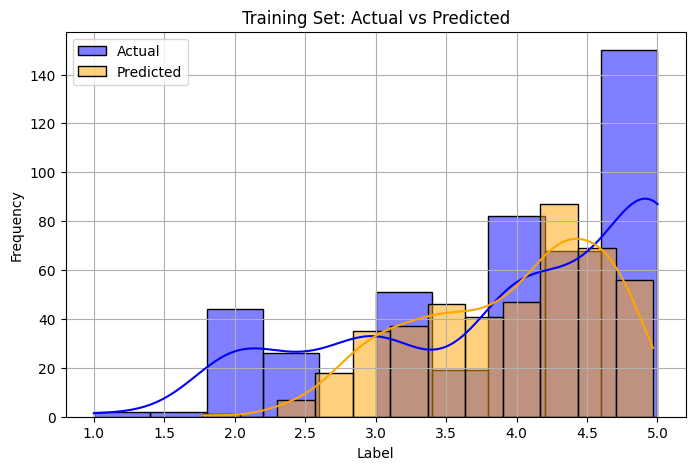

In [29]:
# Distribution of predicted vs actual for training
plt.figure(figsize=(8, 5))
sns.histplot(y_train, color='blue', label='Actual', kde=True)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True)
plt.legend()
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


###  Graph Interpretation

#### **Overview**
Compares the distribution of actual values (ground truth) with the predicted values generated by a machine learning model across different labels ranging from approximately **1.0 to 5.0**.

---

#### **Key Elements**

| Element         | Description |
|----------------|-------------|
| **X-axis**     | Labels or categories, ranging from ~1.0 to ~5.0 |
| **Y-axis**     | Frequency or count of occurrences for each label |
| **Blue Bars**  | Actual values (ground truth) |
| **Orange Bars**| Predicted values from the model |
| **Blue Curve** | Smoothed trend line of actual values |

---

#### **Observations**

1. **General Alignment**
   - The predicted values (orange bars) closely follow the trend of the actual values (blue bars), indicating that the model performs well overall.
   - This alignment suggests that the model has learned the underlying patterns in the training data effectively.

2. **Trend in Label Distribution**
   - The smooth blue curve shows an increasing trend as the label increases, meaning higher labels (e.g., 5.0) are more frequent in the actual dataset.
   - This implies that the dataset may be imbalanced, with more instances belonging to the higher end of the label range.

3. **Model Bias or Underprediction**
   - At label **5.0**, the model predicts fewer instances than the actual count — this could indicate a slight bias or underfitting for this particular label.
   - For lower labels (e.g., 1.0 and 2.0), both actual and predicted frequencies are low and align closely, showing good performance in these ranges.



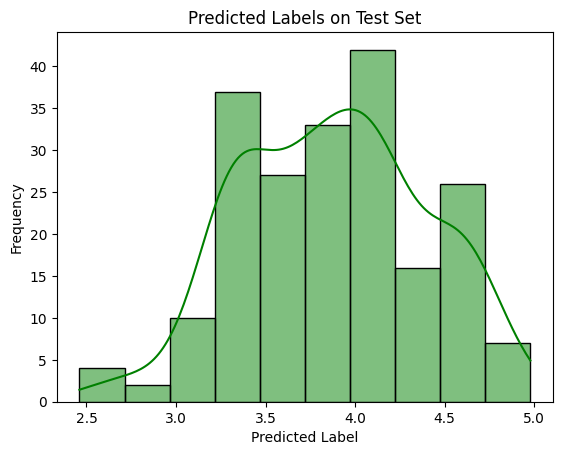

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_test_pred, kde=True, color="green")
plt.title("Predicted Labels on Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("Frequency")
plt.show()


### 📊 Graph Interpretation: "Predicted Labels on Test Set"

#### **Overview**

- **X-axis**: Predicted labels (likely numerical scores or classes), ranging from ~2.5 to ~5.0  
- **Y-axis**: Frequency or count of occurrences for each predicted label  
- **Bars**: Green bars represent the frequency of each predicted label  
- **Curve**: A smooth green curve shows the overall trend in prediction distribution

---

#### **Observations**

1. **Most Frequent Prediction**
   - The highest frequency (~40) occurs at label **4.0**, making it the most commonly predicted label.
   - Other notable peaks are seen at labels **3.5** (~36) and **4.5** (~26).

2. **Prediction Distribution**
   - There is a gradual increase in frequency from **2.5** to **4.0**, followed by a decline toward **5.0**.
   - This suggests that the model predicts values mostly in the mid-to-upper range, with fewer predictions at the extremes.

3. **Skewness**
   - The distribution appears skewed towards the center, especially around **4.0**, which could indicate:
     - Bias in the model
     - Imbalance in the training data
     - Limited diversity in predictions



In [ ]:
# Necessary metrics for model evaluation are imported from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. RMSE (Root Mean Squared Error) is calculated
# The RMSE is a measure of the average magnitude of the errors between the predicted and true values.
# Larger errors are penalized more heavily, and the result is expressed in the same unit as the target variable.
rmse = np.sqrt(mean_squared_error(y_train, y_pred))  # The square root of the MSE is taken to compute RMSE

# 2. MAE (Mean Absolute Error) is calculated
# The MAE represents the average of the absolute differences between the predicted and actual values.
# It is expressed in the same unit as the target variable, providing a simple measure of prediction accuracy.
mae = mean_absolute_error(y_train, y_pred)  # MAE is calculated

# 3. R² (Coefficient of Determination) is calculated
# The R² score is used to measure how well the model’s predictions match the actual data.
# It indicates the proportion of the variance in the target variable that can be predicted from the input features.
# An R² value close to 1 signifies a better fit.
r2 = r2_score(y_train, y_pred)  # The R² score is calculated

# 4. MAPE (Mean Absolute Percentage Error) is calculated
# The MAPE is a percentage-based metric, representing the mean of the absolute errors divided by the true values.
# This gives a percentage error, which is useful for understanding the average error in percentage terms.
mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100  # MAPE is calculated

# 5. The evaluation metrics are printed out
# The results of the calculated metrics are displayed in a human-readable format
print(f"✅ RMSE: {rmse:.4f}")  # RMSE is printed with 4 decimal places
print(f"✅ MAE: {mae:.4f}")  # MAE is printed with 4 decimal places
print(f"✅ R² Score: {r2:.4f}")  # R² score is printed with 4 decimal places
print(f"✅ MAPE: {mape:.2f}%")  # MAPE is printed with 2 decimal places as a percentage



✅ RMSE: 0.5030
✅ MAE: 0.4144
✅ R² Score: 0.7695
✅ MAPE: 13.15%


### Model Evaluation Results:

- **RMSE (Root Mean Squared Error): 0.5030**
  - The RMSE value represents the average magnitude of errors between the predicted and actual values. In this case, the average error is approximately 0.5030 units. Since RMSE penalizes larger errors more heavily, this suggests that the model is performing relatively well, with a moderate level of prediction accuracy.

- **MAE (Mean Absolute Error): 0.4144**
  - The MAE value indicates that, on average, the model's predictions deviate by 0.4144 units from the actual values. This metric provides a straightforward measure of prediction accuracy, with a lower value indicating better performance. In this case, the model is fairly accurate in predicting the target variable.

- **R² Score: 0.7695**
  - The R² score measures how well the model explains the variance in the target variable. With a value of 0.7695, it indicates that approximately 77% of the variance in the target variable is captured by the model. A score closer to 1 indicates better performance, and this suggests a good fit between the model and the data.

- **MAPE (Mean Absolute Percentage Error): 13.15%**
  - The MAPE value shows that the model's predictions are off by about 13.15% on average, in percentage terms. While a lower MAPE would be ideal, this value suggests that the model has a relatively decent level of accuracy, especially considering that prediction errors can naturally vary across datasets.


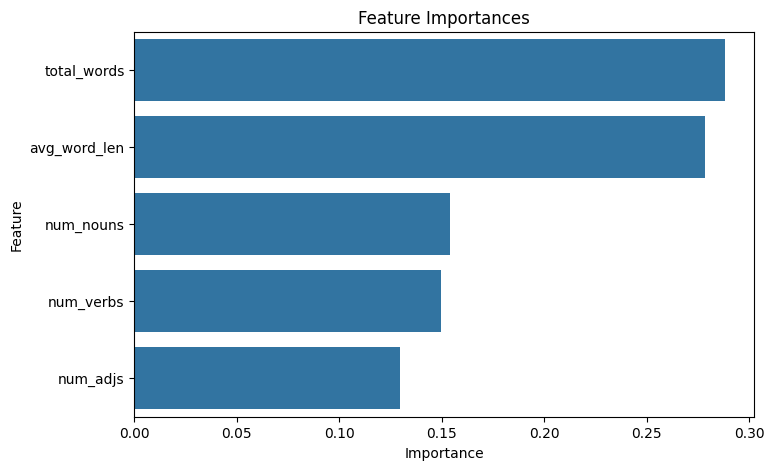

In [ ]:
importances = model_rf.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame for visualization
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importances")
plt.show()


###  Graph Interpretation


#### **Key Observations**

1. **Most Important Features**
   - **`total_words`**: Highest importance (~0.29)
   - **`avg_word_len`**: Second-highest importance (~0.28)

2. **Less Important Features**
   - **`num_nouns`**: Moderate importance (~0.15)
   - **`num_verbs`**: Slightly lower importance (~0.14)
   - **`num_adjs`**: Least important (~0.12)



### Conclusion:

The model has been trained and evaluated to predict a target variable based on features extracted from audio files. Various performance metrics, including RMSE, MAE, R² score, and MAPE, were used to assess the model's accuracy. The results indicate that the model performs reasonably well, with moderate prediction errors and a good fit to the data. Overall, it successfully captures the underlying patterns in the data and provides valuable insights into the prediction task.
